<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Geopandas/base_maps_for_static_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

! pip install geopandas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from google.colab import drive
drive.mount('/content/gdrive')

E: Package 'python-software-properties' has no installation candidate
Extracting templates from packages: 100%
     |████████████████████████████████| 972kB 4.2MB/s 
     |████████████████████████████████| 14.8MB 336kB/s 
     |████████████████████████████████| 6.5MB 52.6MB/s 
Mounted at /content/gdrive


In [2]:

!pip install contextily

     |████████████████████████████████| 19.1MB 1.4MB/s 


In [3]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [4]:
# Read in the conflict points and the boundary shape files using geopandas
conf_data = gpd.read_file("/content/addresses.shp")
ND_Boundary = gpd.read_file("/content/Europe_borders.shp")

In [5]:
conf_data.columns

Index(['address', 'id', 'geometry'], dtype='object')

In [6]:
ND_Boundary.columns

Index(['TZID', 'geometry'], dtype='object')

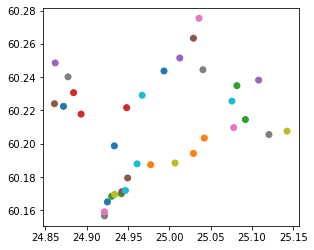

In [9]:
# we specify the column that is going to be used for the symbology
conf_data.plot(column = 'address');

In [14]:
# get the uniques values in event_type column
categories = conf_data.event_type.unique()
# create a list for our custom colors
c = ['m', 'k', 'g', 'r', 'y', 'c']
# create a dictionary to combine both lists, categories are keys and # color codes are values
colorDict = dict(zip(categories,c))
print(colorDict)

AttributeError: ignored

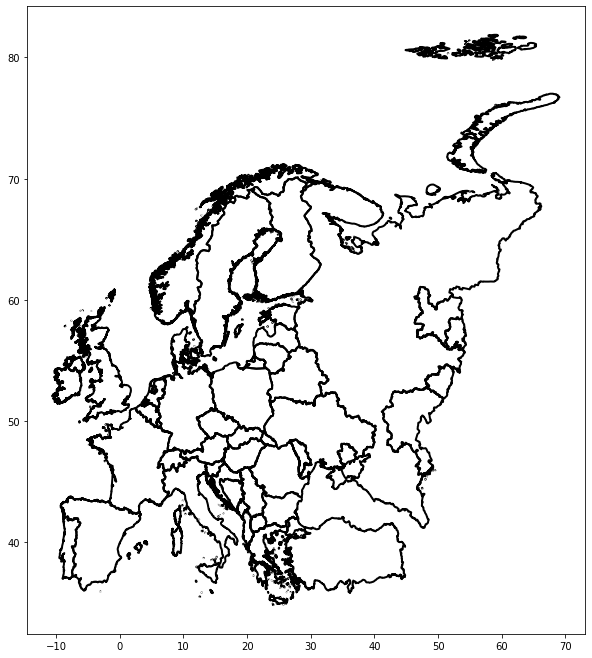

In [15]:
# plot the state's boundary with black edge color only and line width of 2
ax = ND_Boundary.geometry.boundary.plot(figsize = (10,15), color = None, edgecolor = 'K', linewidth=2)
# Loop through each event type group 
#for eventType, data in conf_data.groupby('event_type'):
    #color  = colorDict[eventType]
    #data.plot(ax = ax,  color = color, label = eventType)

In [16]:
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])


In [17]:
print(ctx.providers.OpenStreetMap.keys())

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])


In [18]:
# add open street map basemap
ctx.add_basemap(ax, crs = ND_Boundary.crs, url = ctx.providers.OpenStreetMap.Mapnik)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


<Figure size 432x288 with 0 Axes>